**Importing Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**Data Collection:**

In [ ]:
!git clone https://github.com/dsrscientist/dataset4.git

In [ ]:
# Loading the dataset to Pandas DataFrame
insurance_dataset = pd.read_csv('/content/dataset4/medical_cost_insurance.csv')

In [ ]:
# Number of Rows & Columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# First few rows of the dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.
Categorial Features:
*   sex
*   smoker
*   region





In [ ]:
# Checking missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So, here we can conclude that there are no null values in the dataset given.

**Exploratory Data Analysis & Visualization:**

In [ ]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


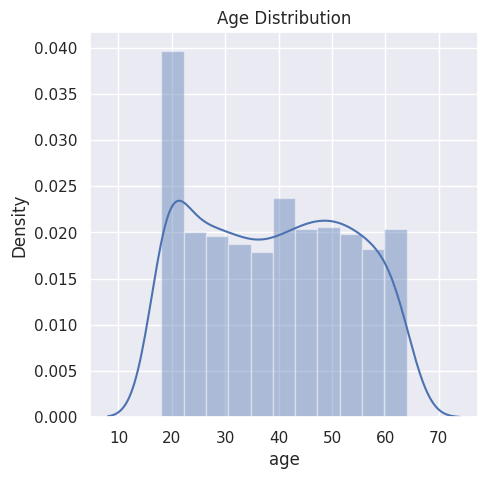

In [ ]:
# Distribution of 'age' values
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

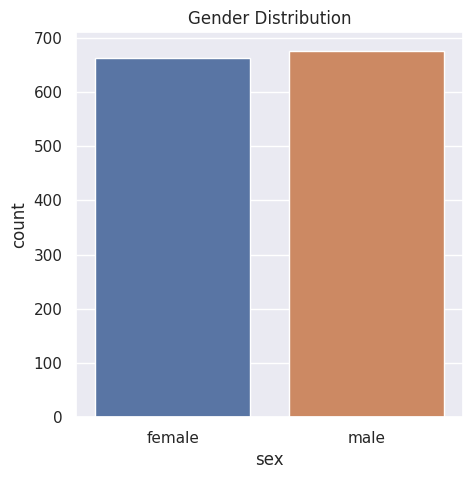

In [ ]:
# 'sex' column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data= insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

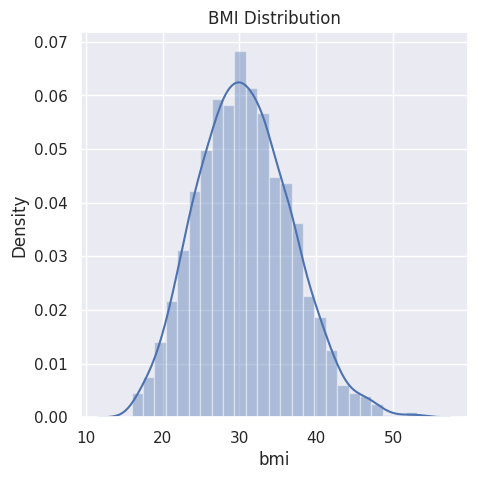

In [ ]:
# Distribution of 'bmi' values
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range: 18.5-24.9

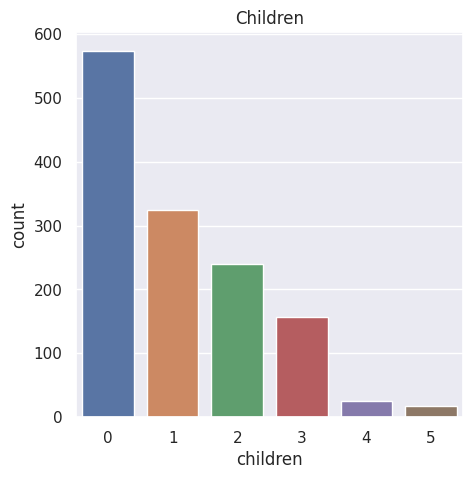

In [ ]:
# 'children' column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data= insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

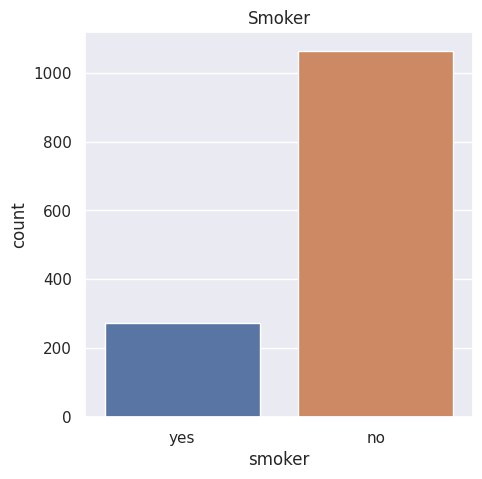

In [ ]:
# 'smoker' column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data= insurance_dataset)
plt.title('Smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

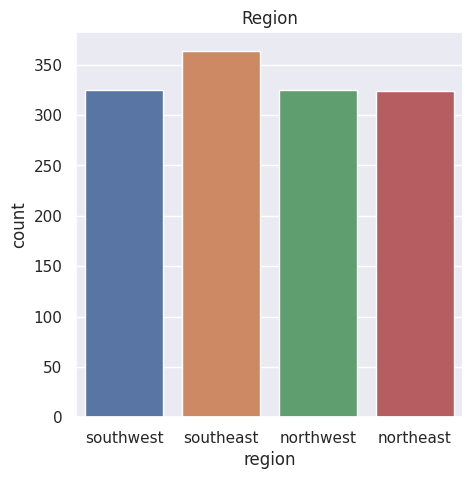

In [ ]:
# 'region' column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data= insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

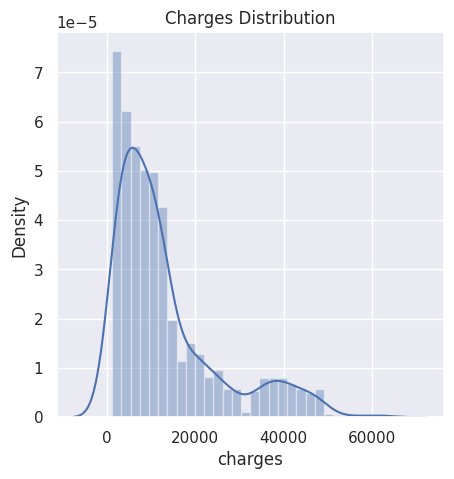

In [ ]:
# Distribution of 'charges' values
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

## **Data Pre-processing:**

**Converting Categorical Features to Numerical**

In [ ]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace= True)
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace= True)
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace= True)

**Splitting the Features and Target:**

In [ ]:
X= insurance_dataset.drop(columns='charges',axis=1)
Y= insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### **Model Training:**

1.   ***Linear Regression***








In [ ]:
# Loading the Linear Regreesion Model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation:**

In [ ]:
# predicting on training data
training_data_prediction= regressor.predict(X_train)

In [ ]:
# R squared value
r2_train= metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ',r2_train)

R squared value :  0.751505643411174


In [ ]:
# predicting on test data
training_data_prediction= regressor.predict(X_test)

In [ ]:
# R squared value
r2_test= metrics.r2_score(Y_test, training_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.7447273869684076


**Building Predictive System:**

In [ ]:
input_data= (31,1,25.74,0,1,0)
#changing input_data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
#reshape the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction= regressor.predict(input_data_reshaped)
print(prediction)
print('The Insurance charges is USD', prediction[0])

[3760.0805765]
The Insurance charges is USD 3760.080576496057
